<a href="https://colab.research.google.com/github/Qcritt/cosc470s24/blob/main/Copy_of_GameOfLifeLists_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 27 14:02:07 2016
Modified 28 October 2022

@author: pcutter

Program Description:  This program implements Conway's game of life.eeeee

"""
import random
import numpy as n
import matplotlib.pyplot as plt

def loadWorld(wsize, whichone):
  world = generateWorld(wsize, 0) # generates an empty world
  if whichone == 1:
    insertList = [[1, 0, 0],
                  [0, 1, 1],
                  [1, 1, 0]]
  elif whichone == 2:
    insertList = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]]
  elif whichone == 3:
    X = np.zeros((17, 17))
    X[2, 4:7] = 1
    X[4:7, 7] = 1
    X += X.T
    X += X[:, ::-1]
    X += X[::-1, :]
    world = list(X)
    return world
  for r in range(len(insertList)):
    for c in range(len(insertList[0])):
      world[r][c] = insertList[r][c]
  return world

""" This function randomly generates a world for Conway's game of life.
PARAMETERS:
    wsize - The world is represented by a wsize x wsize list
    p1 - Proportion of cells that should be 1 (alive) when the program starts

RETURNS:
    world - A wsize x wsize list of 1s and 0s
"""
def generateWorld(wsize, p1):
    world = []
    for i in range(wsize):
      world.append(random.choices([0,1],weights=(1-p1,p1),k=wsize))
    printWorld(world)
    return world

""" This function prints a 2d list of 0s and 1s in rows and columns.
PARAMETERS:
    world - a list of 0s and 1s
"""
def printWorld(world):
  for line in world:
    print(line)


""" This function displays a list of 2d worlds of 0s and 1s as black and white squares.
PARAMETERS:
    worlds - a list of worlds of 0s and 1s
"""
def displayWorld(worlds):
    for world in worlds:
        plt.imshow(world,cmap=plt.cm.gray)
        plt.show()
        plt.pause(0.1)
        plt.close()

""" This function counts the number of 1s among the eight neighbors
    of cell at world[row][col].  Neighborhoods wrap at the edges of the list.
PARAMETERS:
    world - a 2d list of 0s and 1s
    row, col - the position in the world to check
RETURNS:
    numNeighbors - the number of neighbors equal to 1
"""

def countNeighbors(world, row, col):
    # Determine the number of rows and cols in the world.
    rows = len(world)
    cols = len(world[0])

    # Determine what the next and previous row and column are
    # If the specified cell is on the border, its neighborhood
    # will wrap to the other border
    nextRow = (row+1)%rows
    prevRow = (row-1)%rows
    nextCol = (col+1)%cols
    prevCol = (col-1)%cols

    # COMPLETE THE CODE BELOW TO CALCULATE THE NUMBER OF NEIGHBORS THAT ARE 1s.
    # Add the three neighbor cells in the previous row to numNeighbors
    numNeighbors = world[prevRow][prevCol] + world[prevRow][col] + world[prevRow][nextCol]

    # Add the two neighbors in the same row to numNeighbors
    numNeighbors += world[row][prevCol] + world[row][nextCol] # REPLACE THE 0 WITH SOMETHING APPROPRIATE

    # Add the three neighbor cells in the next row to numNeighbors
    numNeighbors += world[nextRow][prevCol]+ world[nextRow][col] + world[nextRow][nextCol]  # REPLACE THE 0 WITH SOMETHING APPROPRIATE

    return numNeighbors

""" This function checks to see if a cell should live
PARAMETERS:
    world - A 2d list of 0s and 1s
    row, col - The position in the world to check
RETURNS:
    1 if the cell should live
    0 otherwise
"""
def isAlive(world, row, col):

    # Determine the number of neighbors of the current cell
    # Use the countNeighbors function
    numNeighbors = countNeighbors(world, row, col)     # REPLACE THE 0 WITH SOMETHING APPROPRIATE

    # WRITE CODE TO IMPLEMENT THE FOLLOWING LOGIC:
    """ If the current cell is alive:
            if it has 2 or 3 neighbors it should live on (stasis) (ie, return 1);
            otherwise it should die (over- or underpopulation) (ie, return 0)
        If the current cell is empty:
            if it has exactly 3 neighbors, it should become alive (reproduction) (return 1)
            otherwise it remains dead (return 0)
    """
    if world[row][col]== 1:
      return 1 if numNeighbors == 2 or numNeighbors == 3 else 0

    else:
        return 1 if numNeighbors == 3 else 0

# This line should get removed once the above logic is implemented

""" This function runs the game of life simulation
PARAMETERS:
    wsize - The world is represented by a square wsize list
    gens - The number of generations to simulate
    prop_alive - Proportion of cells that should be 1 when the program starts
                 This should be a real number in the range [0, 1].
"""
def simulation(wsize, gens, prop_alive):
    # Generate the world
    world = generateWorld(wsize,prop_alive)
    # Alternatively, load a world
    #world = loadWorld(wsize, 1)

    #Create a list of worlds, 1 for the initial world, plus 1 for each generation
    worlds = [0]*(gens+1)
    worlds[0] = world
    # Loop through each generation
    for gen in range(gens):
        nextWorld = [[0]* wsize for i in range(wsize)]  # A list of 0s for the next gen
        rows,cols = len(world),len(world[0])
        # FILL IN THE CODE HERE
        """ For every element in the nextWorld (ie, use a nested for loop)
                Determine whether it should be alive or dead (set it to 1 or 0)
                (Use the isAlive function to handle this)
        """
## 3 lines of code and you want to go through the rows and cols and then sign the isAlive function to either 1 or 0
    for i in range(len(nextWorld)):
      for j in range(len(nextWorld[i])):
        nextWorld[i][j] = isAlive(nextWorld, i, j)

        # Save the current world in the list to be displayed
        worlds[gen+1] = nextWorld

    # Return the list of worlds to be displayed
    return worlds





In [10]:
world = generateWorld(10,0.3)
print(countNeighbors(world, 5, 5))

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
1


The world will be an n x n size grid. Enter this a value for n: 20
Enter proportion (a number between 0 and 1) of cells that should start as alive. .5
Enter the number of generations for the game of life to run: 10
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0

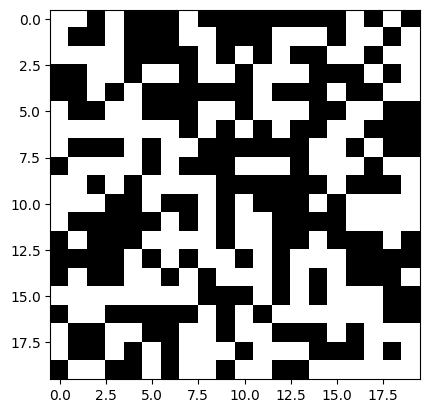

TypeError: Invalid shape () for image data

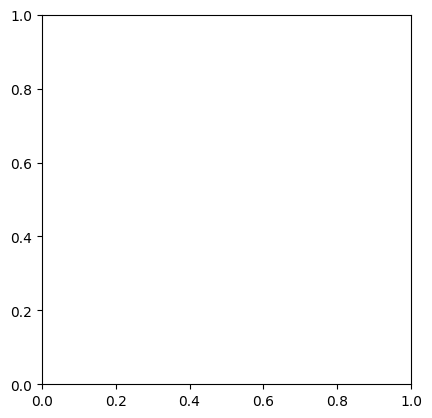

In [5]:
""" This function is the starting point for Conway's game of life.
It gets input from the user for the size of the world, the number of generations,
and the proportion of cells that should be alive.  It then runs the simulation
"""
def main():
    wsize = int(input("The world will be an n x n size grid. Enter this a value for n: "))
    prop_alive = float(input("Enter proportion (a number between 0 and 1) of cells that should start as alive. "))
    gens = int(input("Enter the number of generations for the game of life to run: "))
    worlds = simulation(wsize, gens, prop_alive)
    displayWorld(worlds)

main()

What I discovred while using different parameters was that the higher the percentage of people in the inital world increased the number of people in the next generation. The same would happen for smaller percentages of people in the inital world the quicker the population died off.  